# **Softmax Regresion**

## Credit Card Fraud Detection

### Import libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### Load dataset

In [3]:
dataset_path = 'creditcard.csv'
df = pd.read_csv(dataset_path)

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Split dataset for X, y

In [5]:
dataset_arr = df.to_numpy()
X, y = dataset_arr[:, :-1].astype(np.float64), dataset_arr[:, -1].astype(np.uint8)

In [6]:
print(X)

[[ 0.00000000e+00 -1.35980713e+00 -7.27811733e-02 ...  1.33558377e-01
  -2.10530535e-02  1.49620000e+02]
 [ 0.00000000e+00  1.19185711e+00  2.66150712e-01 ... -8.98309914e-03
   1.47241692e-02  2.69000000e+00]
 [ 1.00000000e+00 -1.35835406e+00 -1.34016307e+00 ... -5.53527940e-02
  -5.97518406e-02  3.78660000e+02]
 ...
 [ 1.72788000e+05  1.91956501e+00 -3.01253846e-01 ...  4.45477214e-03
  -2.65608286e-02  6.78800000e+01]
 [ 1.72788000e+05 -2.40440050e-01  5.30482513e-01 ...  1.08820735e-01
   1.04532821e-01  1.00000000e+01]
 [ 1.72792000e+05 -5.33412522e-01 -1.89733337e-01 ... -2.41530880e-03
   1.36489143e-02  2.17000000e+02]]


In [7]:
print(y)

[0 0 0 ... 0 0 0]


### Add bias to X

In [8]:
intercept = np.ones((X.shape[0], 1))
X_b = np.concatenate((intercept, X), axis=1)

In [9]:
print(X_b)

[[ 1.00000000e+00  0.00000000e+00 -1.35980713e+00 ...  1.33558377e-01
  -2.10530535e-02  1.49620000e+02]
 [ 1.00000000e+00  0.00000000e+00  1.19185711e+00 ... -8.98309914e-03
   1.47241692e-02  2.69000000e+00]
 [ 1.00000000e+00  1.00000000e+00 -1.35835406e+00 ... -5.53527940e-02
  -5.97518406e-02  3.78660000e+02]
 ...
 [ 1.00000000e+00  1.72788000e+05  1.91956501e+00 ...  4.45477214e-03
  -2.65608286e-02  6.78800000e+01]
 [ 1.00000000e+00  1.72788000e+05 -2.40440050e-01 ...  1.08820735e-01
   1.04532821e-01  1.00000000e+01]
 [ 1.00000000e+00  1.72792000e+05 -5.33412522e-01 ... -2.41530880e-03
   1.36489143e-02  2.17000000e+02]]


### One-hot encoding label

In [11]:
n_classes = np.unique(y, axis=0).shape[0]
n_samples = y.shape[0]
y_encoded = np.array([np.zeros(n_classes) for _ in range(n_samples)])
y_encoded[np.arange(n_samples), y] = 1

In [12]:
print(n_classes)
print(n_samples)
print(y_encoded)

2
284807
[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


### Splitting data for train, val, test

In [18]:
val_size = 0.2
test_size = 0.125
random_state = 2
is_shuffle = True

# Splitting data for training and validation
X_train, X_val, y_train, y_val = train_test_split(
    X_b, y_encoded,
    test_size=val_size,
    random_state=random_state,
    shuffle=is_shuffle
)

# Splitting training data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_train, y_train,
    test_size=test_size,
    random_state=random_state,
    shuffle=is_shuffle
)

### Data normalization

In [19]:
normalizer = StandardScaler()
X_train[:, 1:] = normalizer.fit_transform(X_train[:, 1:])
X_val[:, 1:] = normalizer.transform(X_val[:, 1:])
X_test[:, 1:] = normalizer.transform(X_test[:, 1:])

### Init functions

In [23]:
# softmax
def softmax(z):
    exp_z = np.exp(z)
    return exp_z / exp_z.sum(axis=1)[:, None]

# predict
def predict(X, theta):
    z = np.dot(X, theta)
    y_hat = softmax(z)
    return y_hat

# compute loss
def compute_loss(y_hat, y):
    n = y.size
    return (-1 / n) * np.sum(y * np.log(y_hat))

# compute gradient
def compute_gradient(X, y, y_hat):
    n = y.size
    return np.dot(X.T, (y_hat -y)) / n

# update weights
def update_theta(theta, gradient, lr):
    return theta - lr * gradient

# compute accuracy
def compute_accuracy(X, y, theta):
    y_hat = predict(X, theta)
    acc = (np.argmax(y_hat, axis=1) == np.argmax(y, axis=1)).mean()
    return acc

### Declare hyperparameters and initialize weights

In [24]:
lr = 0.01
epochs = 30
batch_size = 1024
n_features = X_train.shape[1]

np.random.seed(random_state)
theta = np.random.uniform(size=(n_features, n_classes))

### Training model

In [25]:
train_accs = []
train_losses = []
val_accs = []
val_losses = []

for epoch in range(epochs):
    train_batch_losses = []
    train_batch_accs = []
    val_batch_losses = []
    val_batch_accs = []

    for i in range(0, X_train.shape[0], batch_size):
        X_i = X_train[i:i+batch_size]
        y_i = y_train[i:i+batch_size]

        y_hat = predict(X_i, theta)
        train_loss = compute_loss(y_hat, y_i)
        gradient = compute_gradient(X_i, y_i, y_hat)
        theta = update_theta(theta, gradient, lr)

        train_batch_losses.append(train_loss)
        train_acc = compute_accuracy(X_train, y_train, theta)
        train_batch_accs.append(train_acc)

        y_val_hat = predict(X_val, theta)
        val_loss = compute_loss(y_val_hat, y_val)
        val_batch_losses.append(val_loss)

        val_acc = compute_accuracy(X_val, y_val, theta)
        val_batch_accs.append(val_acc)

    train_batch_loss = sum(train_batch_losses) / len(train_batch_losses)
    val_batch_loss = sum(val_batch_losses) / len(val_batch_losses)
    train_batch_acc = sum(train_batch_accs) / len(train_batch_accs)
    val_batch_acc = sum(val_batch_accs) / len(val_batch_accs)

    train_losses.append(train_batch_loss)
    val_losses.append(val_batch_loss)
    train_accs.append(train_batch_acc)
    val_accs.append(val_batch_acc)

    print(f'\nEPOCH {epoch + 1}:\tTraining loss: {train_batch_loss:.3f}\tValidation loss: {val_batch_loss:.3f}')



EPOCH 1:	Training loss: 0.300	Validation loss: 0.297

EPOCH 2:	Training loss: 0.176	Validation loss: 0.174

EPOCH 3:	Training loss: 0.115	Validation loss: 0.113

EPOCH 4:	Training loss: 0.081	Validation loss: 0.080

EPOCH 5:	Training loss: 0.062	Validation loss: 0.061

EPOCH 6:	Training loss: 0.049	Validation loss: 0.049

EPOCH 7:	Training loss: 0.041	Validation loss: 0.041

EPOCH 8:	Training loss: 0.035	Validation loss: 0.035

EPOCH 9:	Training loss: 0.031	Validation loss: 0.031

EPOCH 10:	Training loss: 0.028	Validation loss: 0.027

EPOCH 11:	Training loss: 0.025	Validation loss: 0.025

EPOCH 12:	Training loss: 0.023	Validation loss: 0.023

EPOCH 13:	Training loss: 0.021	Validation loss: 0.021

EPOCH 14:	Training loss: 0.020	Validation loss: 0.020

EPOCH 15:	Training loss: 0.019	Validation loss: 0.018

EPOCH 16:	Training loss: 0.017	Validation loss: 0.017

EPOCH 17:	Training loss: 0.017	Validation loss: 0.016

EPOCH 18:	Training loss: 0.016	Validation loss: 0.015

EPOCH 19:	Training

### Visualization

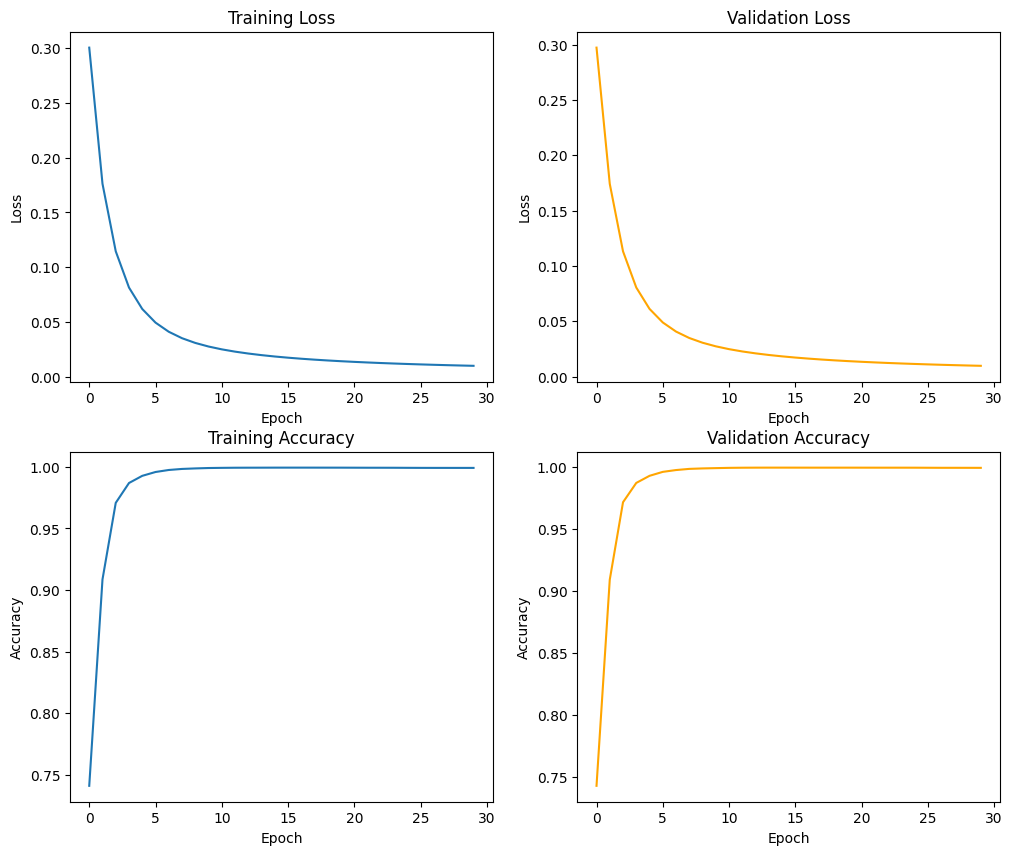

In [26]:
fig, ax = plt.subplots(2, 2, figsize=(12, 10))

# Plot Training Loss
ax[0, 0].plot(train_losses)
ax[0, 0].set(xlabel='Epoch', ylabel='Loss')
ax[0, 0].set_title('Training Loss')

# Plot Validation Loss
ax[0, 1].plot(val_losses, 'orange')
ax[0, 1].set(xlabel='Epoch', ylabel='Loss')
ax[0, 1].set_title('Validation Loss')

# Plot Training Accuracy
ax[1, 0].plot(train_accs)
ax[1, 0].set(xlabel='Epoch', ylabel='Accuracy')
ax[1, 0].set_title('Training Accuracy')

# Plot Validation Accuracy
ax[1, 1].plot(val_accs, 'orange')
ax[1, 1].set(xlabel='Epoch', ylabel='Accuracy')
ax[1, 1].set_title('Validation Accuracy')

plt.show()


### Evaluate model

In [27]:
val_set_acc = compute_accuracy(X_val, y_val, theta)
test_set_acc = compute_accuracy(X_test, y_test, theta)
print("Evaluation on validation and test set:")
print(f"Accuracy: {val_set_acc}")
print(f"Accuracy: {test_set_acc}")

Evaluation on validation and test set:
Accuracy: 0.9993153330290369
Accuracy: 0.9992275552122467


## Twitter Sentiment Analysis

### Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import nltk

nltk.download('stopwords')

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


### Load dataset

In [2]:
dataset_path = 'Twitter_Data.csv'
df = pd.read_csv(dataset_path)

In [3]:
df

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0
...,...,...
162975,why these 456 crores paid neerav modi not reco...,-1.0
162976,dear rss terrorist payal gawar what about modi...,-1.0
162977,did you cover her interaction forum where she ...,0.0
162978,there big project came into india modi dream p...,0.0


### Remove missing data

In [4]:
df = df.dropna()

In [5]:
df

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0
...,...,...
162975,why these 456 crores paid neerav modi not reco...,-1.0
162976,dear rss terrorist payal gawar what about modi...,-1.0
162977,did you cover her interaction forum where she ...,0.0
162978,there big project came into india modi dream p...,0.0


### Dataset preprocessing

#### Build a text normalization function

In [7]:
def text_normalize(text):
    # Lowercasing
    text = text.lower()

    # Retweet old acronym "RT" removal
    text = re.sub(r'^rt[\s]+', '', text)

    # Hyperlinks removal
    text = re.sub(r'https?:\/\/.*[\r\n]*', '', text)

    # Punctuation removal
    text = re.sub(r'[^\w\s]', '', text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = text.split()
    words = [word for word in words if word not in stop_words]
    text = ' '.join(words)

    # Stemming
    stemmer = SnowballStemmer('english')
    words = text.split()
    words = [stemmer.stem(word) for word in words]
    text = ' '.join(words)

    return text

In [8]:
df['clean_text'] = df['clean_text'].apply(lambda x: text_normalize(x))

<ipython-input-8-842e3689eaa7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clean_text'] = df['clean_text'].apply(lambda x: text_normalize(x))


In [9]:
df

,clean_text,category
0,modi promis minimum govern maximum govern expe...,-1.0
1,talk nonsens continu drama vote modi,0.0
2,say vote modi welcom bjp told rahul main campa...,1.0
3,ask support prefix chowkidar name modi great s...,1.0
4,answer among power world leader today trump pu...,1.0
...,...,...
162975,456 crore paid neerav modi recov congress lead...,-1.0
162976,dear rss terrorist payal gawar modi kill 1000 ...,-1.0
162977,cover interact forum left,0.0
162978,big project came india modi dream project happ...,0.0


#### Initialize tf-idf vectorizer

In [10]:
vectorizer = TfidfVectorizer(max_features=2000)
X = vectorizer.fit_transform(df["clean_text"]).toarray()

#### Add bias to X

In [11]:
intercept = np.ones((X.shape[0], 1))
X_b = np.concatenate((intercept, X), axis=1)

### One-hot encoding label

In [12]:
# Get number of unique classes and samples from the 'category' column in the DataFrame
n_classes = df['category'].nunique()
n_samples = df['category'].size

# Convert the 'category' column to a numpy array and shift labels by +1
y = df['category'].to_numpy() + 1
y = y.astype(np.uint8)

# Create a one-hot encoded array for y
y_encoded = np.array(
    [np.zeros(n_classes) for _ in range(n_samples)]
)
y_encoded[np.arange(n_samples), y] = 1

### Split train, val, test

In [13]:
val_size = 0.2
test_size = 0.125
random_state = 2
is_shuffle = True

# First split: creating training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X_b, y_encoded,
    test_size=val_size,
    random_state=random_state,
    shuffle=is_shuffle
)

# Second split: further splitting the training set into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_train, y_train,
    test_size=test_size,
    random_state=random_state,
    shuffle=is_shuffle
)

### Init functions

In [14]:
# softmax
def softmax(z):
    exp_z = np.exp(z)
    return exp_z / exp_z.sum(axis=1)[:, None]

# predict
def predict(X, theta):
    z = np.dot(X, theta)
    y_hat = softmax(z)
    return y_hat

# compute loss
def compute_loss(y_hat, y):
    n = y.size
    return (-1 / n) * np.sum(y * np.log(y_hat))

# compute gradient
def compute_gradient(X, y, y_hat):
    n = y.size
    return np.dot(X.T, (y_hat -y)) / n

# update weights
def update_theta(theta, gradient, lr):
    return theta - lr * gradient

# compute accuracy
def compute_accuracy(X, y, theta):
    y_hat = predict(X, theta)
    acc = (np.argmax(y_hat, axis=1) == np.argmax(y, axis=1)).mean()
    return acc

### Declare hyperparameters and initialize weights

In [15]:
lr = 0.1
epochs = 200
batch_size = X_train.shape[0]
n_features = X_train.shape[1]

np.random.seed(random_state)
theta = np.random.uniform(size=(n_features, n_classes))

### Training model

In [16]:
train_accs = []
train_losses = []
val_accs = []
val_losses = []

for epoch in range(epochs):
    train_batch_losses = []
    train_batch_accs = []
    val_batch_losses = []
    val_batch_accs = []

    for i in range(0, X_train.shape[0], batch_size):
        X_i = X_train[i:i+batch_size]
        y_i = y_train[i:i+batch_size]

        y_hat = predict(X_i, theta)
        train_loss = compute_loss(y_hat, y_i)
        gradient = compute_gradient(X_i, y_i, y_hat)
        theta = update_theta(theta, gradient, lr)

        train_batch_losses.append(train_loss)
        train_acc = compute_accuracy(X_train, y_train, theta)
        train_batch_accs.append(train_acc)

        y_val_hat = predict(X_val, theta)
        val_loss = compute_loss(y_val_hat, y_val)
        val_batch_losses.append(val_loss)

        val_acc = compute_accuracy(X_val, y_val, theta)
        val_batch_accs.append(val_acc)

    train_batch_loss = sum(train_batch_losses) / len(train_batch_losses)
    val_batch_loss = sum(val_batch_losses) / len(val_batch_losses)
    train_batch_acc = sum(train_batch_accs) / len(train_batch_accs)
    val_batch_acc = sum(val_batch_accs) / len(val_batch_accs)

    train_losses.append(train_batch_loss)
    val_losses.append(val_batch_loss)
    train_accs.append(train_batch_acc)
    val_accs.append(val_batch_acc)

    print(f'\nEPOCH {epoch + 1}:\tTraining loss: {train_batch_loss:.3f}\tValidation loss: {val_batch_loss:.3f}')


EPOCH 1:	Training loss: 0.384	Validation loss: 0.384

EPOCH 2:	Training loss: 0.384	Validation loss: 0.384

EPOCH 3:	Training loss: 0.384	Validation loss: 0.383

EPOCH 4:	Training loss: 0.383	Validation loss: 0.383

EPOCH 5:	Training loss: 0.383	Validation loss: 0.383

EPOCH 6:	Training loss: 0.382	Validation loss: 0.382

EPOCH 7:	Training loss: 0.382	Validation loss: 0.382

EPOCH 8:	Training loss: 0.382	Validation loss: 0.382

EPOCH 9:	Training loss: 0.382	Validation loss: 0.381

EPOCH 10:	Training loss: 0.381	Validation loss: 0.381

EPOCH 11:	Training loss: 0.381	Validation loss: 0.381

EPOCH 12:	Training loss: 0.381	Validation loss: 0.380

EPOCH 13:	Training loss: 0.380	Validation loss: 0.380

EPOCH 14:	Training loss: 0.380	Validation loss: 0.380

EPOCH 15:	Training loss: 0.380	Validation loss: 0.380

EPOCH 16:	Training loss: 0.380	Validation loss: 0.379

EPOCH 17:	Training loss: 0.379	Validation loss: 0.379

EPOCH 18:	Training loss: 0.379	Validation loss: 0.379

EPOCH 19:	Training

### Visualization

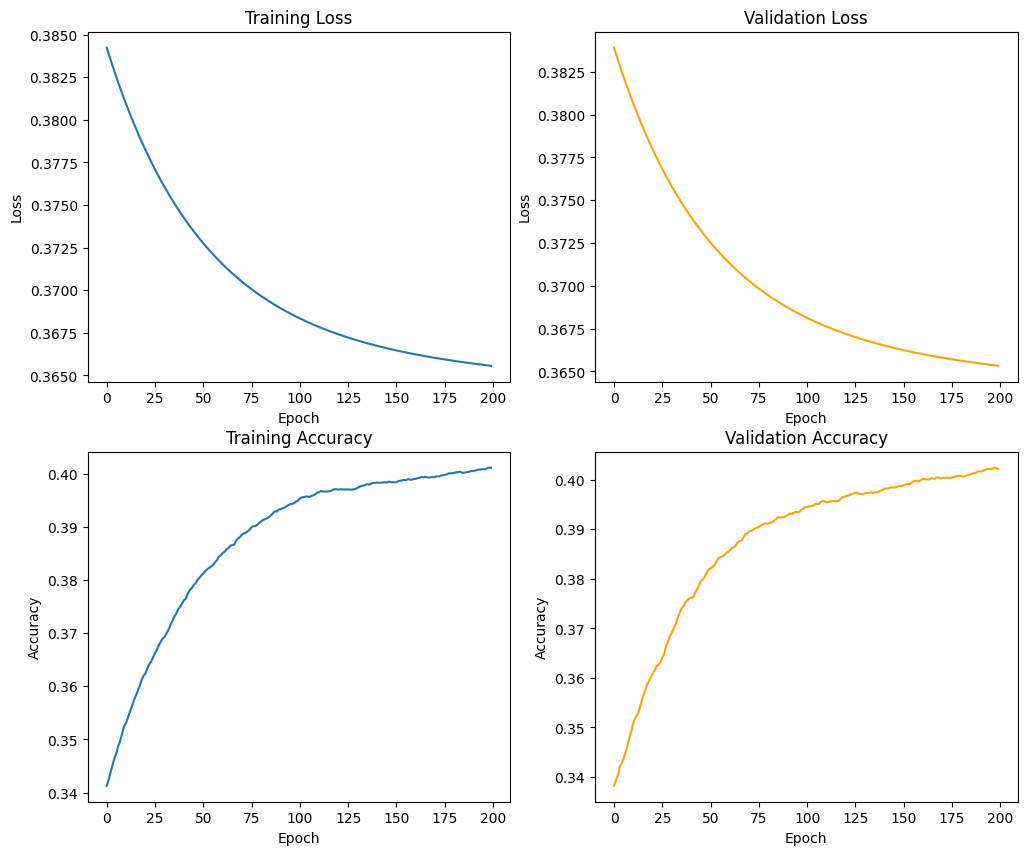

In [17]:
fig, ax = plt.subplots(2, 2, figsize=(12, 10))

# Plot Training Loss
ax[0, 0].plot(train_losses)
ax[0, 0].set(xlabel='Epoch', ylabel='Loss')
ax[0, 0].set_title('Training Loss')

# Plot Validation Loss
ax[0, 1].plot(val_losses, 'orange')
ax[0, 1].set(xlabel='Epoch', ylabel='Loss')
ax[0, 1].set_title('Validation Loss')

# Plot Training Accuracy
ax[1, 0].plot(train_accs)
ax[1, 0].set(xlabel='Epoch', ylabel='Accuracy')
ax[1, 0].set_title('Training Accuracy')

# Plot Validation Accuracy
ax[1, 1].plot(val_accs, 'orange')
ax[1, 1].set(xlabel='Epoch', ylabel='Accuracy')
ax[1, 1].set_title('Validation Accuracy')

plt.show()

### Evaluate model

In [18]:
val_set_acc = compute_accuracy(X_val, y_val, theta)
test_set_acc = compute_accuracy(X_test, y_test, theta)
print("Evaluation on validation and test set: ")
print(f"Accuracy: {val_set_acc}")
print(f"Accuracy: {test_set_acc}")

Evaluation on validation and test set: 
Accuracy: 0.40219058722464257
Accuracy: 0.4047370681720562


## Multiple choice section

1. B
2. B
3. C
4. D
5. B
6. B
7. A
8. C
9. C
10. D
